In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
 typhoon_data=pd.read_csv('/content/drive/MyDrive/Typhoon_Dataset/typhoon.csv')

In [ ]:
typhoon_data.head()

,code,LAT,LONG,PRS,WND,SiR34,SATSer
0,1.980030e+11,13.16,177.34,990.0,24.3,137.7,GOE-3
1,1.980030e+11,15.97,177.20,987.0,27.5,182.9,GOE-3
2,1.980030e+11,17.90,178.28,987.0,25.9,140.8,GOE-3
3,1.980030e+11,18.75,179.01,992.0,22.2,111.6,GOE-3
4,1.980030e+11,19.40,179.68,994.0,22.1,125.5,GOE-3


In [ ]:
typhoon_data.tail()

,code,LAT,LONG,PRS,WND,SiR34,SATSer
29983,2.016310e+11,14.95,116.37,983.0,29.2,125.3,MET-7
29984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29985,2.016310e+11,14.68,115.93,990.0,23.8,136.4,MET-7
29986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29987,2.016310e+11,14.24,115.45,997.0,18.5,180.1,MET-7


In [ ]:
typhoon_data.shape

(29988, 7)

In [ ]:
typhoon_data.columns

Index(['code', 'LAT', 'LONG', 'PRS', 'WND', 'SiR34', 'SATSer'], dtype='object')

In [ ]:
typhoon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29988 entries, 0 to 29987
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    14998 non-null  float64
 1   LAT     14998 non-null  float64
 2   LONG    14998 non-null  float64
 3   PRS     14998 non-null  float64
 4   WND     14998 non-null  float64
 5   SiR34   14998 non-null  float64
 6   SATSer  14998 non-null  object 
dtypes: float64(6), object(1)
memory usage: 1.6+ MB


In [ ]:
typhoon_data.describe()

,code,LAT,LONG,PRS,WND,SiR34
count,1.499800e+04,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,1.997285e+11,20.689044,132.978030,970.767636,31.996806,184.908928
std,9.965561e+08,7.222782,13.798018,21.290629,10.736364,49.215084
min,1.980030e+11,1.500000,100.300000,879.000000,17.200000,54.100000
25%,1.989100e+11,15.440000,123.300000,958.000000,23.000000,149.100000
50%,1.996290e+11,19.820000,131.670000,977.000000,30.000000,179.900000
75%,2.005150e+11,25.380000,142.080000,988.000000,39.100000,215.800000
max,2.016310e+11,48.550000,179.680000,1004.000000,73.200000,447.500000


In [ ]:
typhoon_data.isnull().sum()

code      14990
LAT       14990
LONG      14990
PRS       14990
WND       14990
SiR34     14990
SATSer    14990
dtype: int64

In [ ]:
typhoon_data.dropna(inplace = True)

In [ ]:
typhoon_data.shape

(14998, 7)

In [ ]:
typhoon_data.isnull().sum()

code      0
LAT       0
LONG      0
PRS       0
WND       0
SiR34     0
SATSer    0
dtype: int64

In [ ]:
typhoon_data['Time']=pd.to_datetime(typhoon_data['code'])
typhoon_data['NO']=typhoon_data['code']//int(1e6)

In [ ]:
typhoon_data.head()

,code,LAT,LONG,PRS,WND,SiR34,SATSer,Time,NO
0,1.980030e+11,13.16,177.34,990.0,24.3,137.7,GOE-3,1970-01-01 00:03:18.003,198003.0
1,1.980030e+11,15.97,177.20,987.0,27.5,182.9,GOE-3,1970-01-01 00:03:18.003,198003.0
2,1.980030e+11,17.90,178.28,987.0,25.9,140.8,GOE-3,1970-01-01 00:03:18.003,198003.0
3,1.980030e+11,18.75,179.01,992.0,22.2,111.6,GOE-3,1970-01-01 00:03:18.003,198003.0
4,1.980030e+11,19.40,179.68,994.0,22.1,125.5,GOE-3,1970-01-01 00:03:18.003,198003.0


In [ ]:
typhoon_data.tail()


,code,LAT,LONG,PRS,WND,SiR34,SATSer,Time,NO
29979,2.016310e+11,14.38,118.65,977.0,34.5,161.4,MET-7,1970-01-01 00:03:21.631,201631.0
29981,2.016310e+11,14.75,117.23,980.0,32.3,132.2,MET-7,1970-01-01 00:03:21.631,201631.0
29983,2.016310e+11,14.95,116.37,983.0,29.2,125.3,MET-7,1970-01-01 00:03:21.631,201631.0
29985,2.016310e+11,14.68,115.93,990.0,23.8,136.4,MET-7,1970-01-01 00:03:21.631,201631.0
29987,2.016310e+11,14.24,115.45,997.0,18.5,180.1,MET-7,1970-01-01 00:03:21.631,201631.0


In [ ]:
typhoon_data_198003 = typhoon_data[typhoon_data['NO'] == 198003.0]

In [ ]:
typhoon_data['NO'].unique()


array([198003., 198015., 198026., 198101., 198102., 198103., 198104.,
       198105., 198106., 198107., 198108., 198111., 198112., 198113.,
       198115., 198117., 198119., 198120., 198121., 198122., 198123.,
       198124., 198126., 198128., 198129., 198131., 198132., 198133.,
       198134., 198135., 198201., 198202., 198203., 198204., 198205.,
       198206., 198207., 198208., 198209., 198210., 198211., 198212.,
       198213., 198214., 198215., 198216., 198217., 198218., 198219.,
       198220., 198222., 198223., 198224., 198227., 198228., 198301.,
       198302., 198303., 198304., 198305., 198306., 198307., 198309.,
       198311., 198312., 198314., 198315., 198316., 198317., 198318.,
       198319., 198321., 198322., 198323., 198324., 198326., 198328.,
       198401., 198402., 198403., 198404., 198405., 198406., 198407.,
       198408., 198412., 198413., 198417., 198418., 198419., 198421.,
       198422., 198423., 198424., 198427., 198428., 198430., 198432.,
       198433., 1984

In [ ]:
typhoon_data['NO'].value_counts()

198620.0    59
199435.0    57
200301.0    56
198305.0    53
201412.0    51
            ..
201511.0     1
199406.0     1
199213.0     1
199011.0     1
199501.0     1
Name: NO, Length: 824, dtype: int64

In [ ]:
typhoon_data_198003.head()

,code,LAT,LONG,PRS,WND,SiR34,SATSer,Time,NO
0,1.980030e+11,13.16,177.34,990.0,24.3,137.7,GOE-3,1970-01-01 00:03:18.003,198003.0
1,1.980030e+11,15.97,177.20,987.0,27.5,182.9,GOE-3,1970-01-01 00:03:18.003,198003.0
2,1.980030e+11,17.90,178.28,987.0,25.9,140.8,GOE-3,1970-01-01 00:03:18.003,198003.0
3,1.980030e+11,18.75,179.01,992.0,22.2,111.6,GOE-3,1970-01-01 00:03:18.003,198003.0
4,1.980030e+11,19.40,179.68,994.0,22.1,125.5,GOE-3,1970-01-01 00:03:18.003,198003.0


In [ ]:
typhoon_data_198003.tail()

,code,LAT,LONG,PRS,WND,SiR34,SATSer,Time,NO
0,1.980030e+11,13.16,177.34,990.0,24.3,137.7,GOE-3,1970-01-01 00:03:18.003,198003.0
1,1.980030e+11,15.97,177.20,987.0,27.5,182.9,GOE-3,1970-01-01 00:03:18.003,198003.0
2,1.980030e+11,17.90,178.28,987.0,25.9,140.8,GOE-3,1970-01-01 00:03:18.003,198003.0
3,1.980030e+11,18.75,179.01,992.0,22.2,111.6,GOE-3,1970-01-01 00:03:18.003,198003.0
4,1.980030e+11,19.40,179.68,994.0,22.1,125.5,GOE-3,1970-01-01 00:03:18.003,198003.0


In [ ]:
def concat_func(x):
 return pd.Series({
  'Start':x['Time'].min(),
  'End':x['Time'].max(),
  'StLAT':x.loc[x['Time'].idxmin()]['LAT'],
  'EdLAT':x.loc[x['Time'].idxmax()]['LAT'],
  'StLONG':x.loc[x['Time'].idxmin()]['LONG'],
  'EdLONG':x.loc[x['Time'].idxmax()]['LONG'],
  'WND':x['WND'].max(),
  'SiR34':x['SiR34'].max(),
  'SATSer':','.join(x['SATSer'].unique()),
 })
weather_data=typhoon_data.groupby(typhoon_data['NO']).apply(concat_func).reset_index()

In [ ]:
weather_data.head()

,NO,Start,End,StLAT,EdLAT,StLONG,EdLONG,WND,SiR34,SATSer
0,198003.0,1970-01-01 00:03:18.003,1970-01-01 00:03:18.003,13.16,13.16,177.34,177.34,27.5,182.9,GOE-3
1,198015.0,1970-01-01 00:03:18.015,1970-01-01 00:03:18.015,14.15,14.15,157.04,157.04,31.3,199.7,"GOE-3,GOE-3"
2,198026.0,1970-01-01 00:03:18.026,1970-01-01 00:03:18.026,14.36,14.36,156.09,156.09,20.2,172.1,GOE-3
3,198101.0,1970-01-01 00:03:18.101,1970-01-01 00:03:18.101,7.46,7.46,165.92,165.92,46.9,236.5,GMS-1
4,198102.0,1970-01-01 00:03:18.102,1970-01-01 00:03:18.102,6.32,6.32,151.14,151.14,27.9,203.1,GMS-1


In [ ]:
weather_data.tail()

,NO,Start,End,StLAT,EdLAT,StLONG,EdLONG,WND,SiR34,SATSer
819,201623.0,1970-01-01 00:03:21.623,1970-01-01 00:03:21.623,20.48,20.48,117.80,117.80,26.2,126.6,MET-7
820,201624.0,1970-01-01 00:03:21.624,1970-01-01 00:03:21.624,13.83,13.83,126.48,126.48,53.4,232.3,MET-7
821,201625.0,1970-01-01 00:03:21.625,1970-01-01 00:03:21.625,16.03,16.03,126.00,126.00,64.6,302.4,MET-7
822,201629.0,1970-01-01 00:03:21.629,1970-01-01 00:03:21.629,11.78,11.78,120.73,120.73,26.3,133.3,MET-7
823,201631.0,1970-01-01 00:03:21.631,1970-01-01 00:03:21.631,13.60,13.60,126.72,126.72,61.7,262.6,MET-7


In [ ]:
weather_data.shape


(824, 10)

In [ ]:
weather_data.columns

Index(['NO', 'Start', 'End', 'StLAT', 'EdLAT', 'StLONG', 'EdLONG', 'WND',
       'SiR34', 'SATSer'],
      dtype='object')

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   NO      824 non-null    float64       
 1   Start   824 non-null    datetime64[ns]
 2   End     824 non-null    datetime64[ns]
 3   StLAT   824 non-null    float64       
 4   EdLAT   824 non-null    float64       
 5   StLONG  824 non-null    float64       
 6   EdLONG  824 non-null    float64       
 7   WND     824 non-null    float64       
 8   SiR34   824 non-null    float64       
 9   SATSer  824 non-null    object        
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 64.5+ KB


In [ ]:
weather_data.describe()

,NO,StLAT,EdLAT,StLONG,EdLONG,WND,SiR34
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,199755.842233,16.595328,16.595328,135.512002,135.512002,36.823422,229.755218
std,1019.999754,5.699368,5.699368,14.989767,14.989767,13.206671,59.636712
min,198003.000000,1.500000,1.500000,102.040000,102.040000,17.300000,96.700000
25%,198910.750000,12.267500,12.267500,125.337500,125.337500,24.775000,186.250000
50%,199702.500000,16.335000,16.335000,133.745000,133.745000,36.000000,228.350000
75%,200609.250000,20.135000,20.135000,146.395000,146.395000,47.400000,270.525000
max,201631.000000,32.970000,32.970000,177.340000,177.340000,73.200000,447.500000


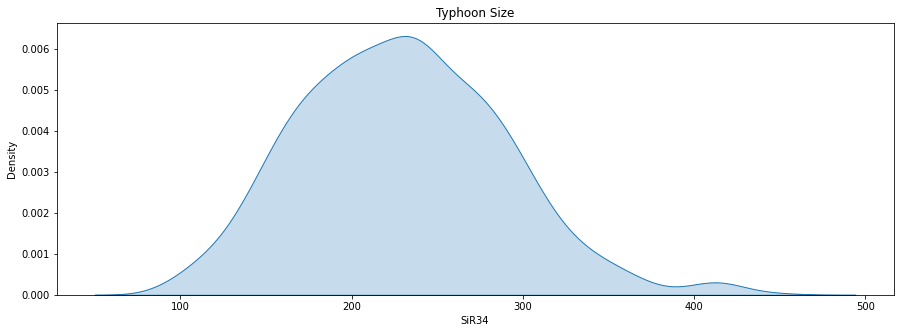

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(data = weather_data['SiR34'], shade=True);
plt.title('Typhoon Size')
plt.xticks(rotation = 0)
plt.show()

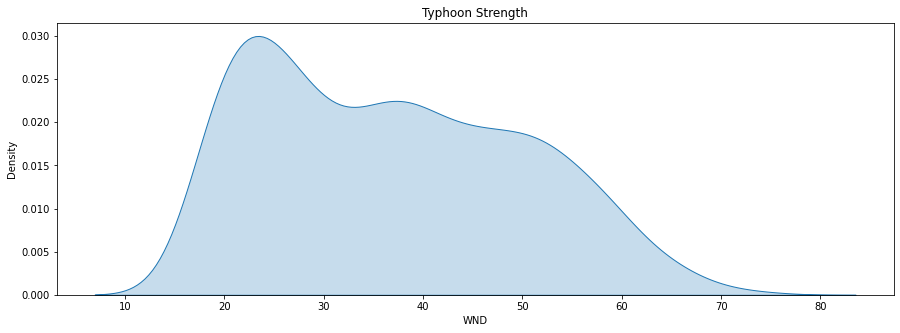

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(data = weather_data['WND'], shade=True);
plt.title('Typhoon Strength')
plt.xticks(rotation = 0)
plt.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import folium

In [ ]:
fig_city = px.scatter_geo(weather_data, lat='StLAT', lon='StLONG',
scope="asia",
hover_name=weather_data['NO'],
size=weather_data['SiR34'],
color='WND',
title ='Typhoon Start')
fig_city.show()

In [ ]:
weather_data_new = weather_data[['WND', 'SiR34']]

In [ ]:
weather_data_new.corr()

,WND,SiR34
WND,1.000000,0.598876
SiR34,0.598876,1.000000


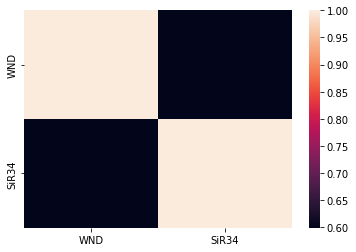

In [ ]:
sns.heatmap(weather_data_new.corr())